<a href="https://www.kaggle.com/code/surekhaberlin/binary-prediction-of-poisonous-mushrooms?scriptVersionId=193144979" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


# STEP 0: Importing Libraries

In [2]:
!pip install skimpy
!pip install fastdtw
!pip install colorama

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28.8/28.8 MB 44.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: polars
    Found existing installation: polars 1.1.0
    Uninstalling polars-1.1.0:
      Successfully uninstalled polars-1.1.0
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have di

In [3]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Skimpy
import skimpy

# Sklearn (Scikit-learn)
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, QuantileTransformer
from sklearn.base import clone
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Statistics
from scipy.stats import friedmanchisquare

# Boosting Models
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Colorama
from colorama import Fore, Style

# Itertools
from itertools import combinations

# Warnings
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)


In [4]:
SUBMIT = True

In [5]:
from bs4 import BeautifulSoup

In [6]:
from colorama import Fore, Style, init

# Initialize colorama
init(autoreset=True)

def printColor(pText: str):
    print(f'{Style.BRIGHT}{Fore.BLUE}{pText}{Style.RESET_ALL}')

# STEP 1: Reading the file

In [7]:
# Loading the data
train = pd.read_csv(r'/kaggle/input/playground-series-s4e8/train.csv', index_col='id')

test = pd.read_csv(r'/kaggle/input/playground-series-s4e8/test.csv', index_col='id')

sub = pd.read_csv(r'/kaggle/input/playground-series-s4e8/sample_submission.csv')

# STEP 2: Data Understanding

In [8]:
import pandas as pd
import random
from IPython.display import HTML, display

# Function to style tables
def style_table(df):
    styled_df = df.style.set_table_styles([
        {"selector": "th", "props": [("color", "white"), ("background-color", '#3f51b5')]}
    ]).set_properties(**{"text-align": "center"}).hide(axis="index")
    return styled_df.to_html()

# Function to create styled heading with emojis
def styled_heading(text, background_color='#3f51b5', text_color='white'):
    return f"""
    <div style="
        text-align: center;
        background: {background_color};
        color: {text_color};
        padding: 20px;
        font-size: 24px;
        font-weight: bold;
        border-radius: 10px;
        margin-bottom: 20px;
        box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);
        border: 2px solid {background_color};
    ">
        {text}
    </div>
    """

def print_dataset_analysis(dataset, dataset_name, n_top=5, heading_color='#3f51b5', text_color='white'):
    heading = styled_heading(f"üìä {dataset_name} Overview", heading_color, text_color)
    display(HTML(heading))
    
    display(HTML("<h2 style='font-size: 18px; margin-top: 18px;'>üìè Shape of the Dataset</h2>"))
    display(HTML(f"<p>{dataset.shape[0]} rows and {dataset.shape[1]} columns</p>"))
    
    display(HTML("<h2 style='font-size: 18px; margin-top: 18px;'>üîç First 5 Rows</h2>"))
    display(HTML(style_table(dataset.head(n_top))))
    
    display(HTML("<h2 style='font-size: 18px; margin-top: 18px;'>üìä Summary Statistics</h2>"))
    display(HTML(style_table(dataset.describe())))
    
    display(HTML("<h2 style='font-size: 18px; margin-top: 18px;'>üîß Null Values</h2>"))
    null_counts = dataset.isnull().sum()
    if null_counts.sum() == 0:
        display(HTML("<p>No null values found.</p>"))
    else:
        display(HTML(style_table(null_counts[null_counts > 0].to_frame(name='Null Values'))))
    
    display(HTML("<h2 style='font-size: 18px; margin-top: 18px;'>‚ôªÔ∏è Duplicate Rows</h2>"))
    duplicate_count = dataset.duplicated().sum()
    display(HTML(f"<p>{duplicate_count} duplicate rows found.</p>"))
    
    display(HTML("<h2 style='font-size: 18px; margin-top: 18px;'>üóÇÔ∏è Data Types</h2>"))
    dtypes_table = pd.DataFrame({
        'Column Name': dataset.columns,
        'Data Type': [dataset[col].dtype for col in dataset.columns]
    })
    display(HTML(style_table(dtypes_table)))
    
    display(HTML("<h2 style='font-size: 18px; margin-top: 18px;'>üìã Column Names</h2>"))
    display(HTML(f"<p>{', '.join(dataset.columns)}</p>"))
    
    display(HTML("<h2 style='font-size: 18px; margin-top: 18px;'>üî¢ Unique Values</h2>"))
    unique_values_table = pd.DataFrame({
        'Column Name': dataset.columns,
        'Unique Values': [', '.join(map(str, dataset[col].unique()[:7])) + (', ...' if len(dataset[col].unique()) > 7 else '') for col in dataset.columns]
    })
    display(HTML(style_table(unique_values_table)))


# Loading the data
train = pd.read_csv(r'/kaggle/input/playground-series-s4e8/train.csv', index_col='id')

test = pd.read_csv(r'/kaggle/input/playground-series-s4e8/test.csv', index_col='id')

sub = pd.read_csv(r'/kaggle/input/playground-series-s4e8/sample_submission.csv')

# Print dataset analyses
print_dataset_analysis(train, "Training Data", heading_color='#3f51b5')  # Deep Blue

print_dataset_analysis(test, "Test Data", heading_color='#3f51b5')  # Deep Blue

print_dataset_analysis(sub, "Sample Solution", heading_color='#3f51b5')  # Deep Blue

In [9]:
from colorama import Fore, Style, init

# Initialize colorama (especially important for Windows)
init(autoreset=True)
train_shape = train.shape
test_shape = test.shape

# Print the shapes with colorama styles
print(f'{Style.BRIGHT}{Fore.YELLOW} SHAPE')
print(f'{Style.BRIGHT}{Fore.YELLOW} -> train: {Fore.GREEN} {train_shape}')
print(f'{Style.BRIGHT}{Fore.YELLOW} -> test:  {Fore.GREEN} {test_shape}')

 SHAPE
 -> train:  (3116945, 21)
 -> test:   (2077964, 20)


In [10]:
# Identify categorical columns
cat_cols = train.select_dtypes(include='object').columns.tolist()

print("Original Categorical Columns:", cat_cols)

# Remove 'class' column from the list
if "class" in cat_cols:
    cat_cols.remove("class")

print("Categorical Columns after removal:", cat_cols)

Original Categorical Columns: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
Categorical Columns after removal: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


In [11]:
target = ["class"]

In [12]:
# identify numerical columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [13]:
num_cols

['cap-diameter', 'stem-height', 'stem-width']

In [16]:
# Use skimpy to generate a summary
skimpy.skim(train)

‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ skimpy summary ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ
‚îÇ          Data Summary                 Data Types                                                                ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì                                                         ‚îÇ
‚îÇ ‚îÉ dataframe         ‚îÉ Values  ‚îÉ ‚îÉ Column Type ‚îÉ Count ‚îÉ                                                         ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©                                                         ‚îÇ
‚îÇ ‚îÇ Number of rows    ‚îÇ 3116945 ‚îÇ ‚îÇ string      ‚îÇ 18    ‚îÇ                                                         ‚îÇ
‚îÇ ‚îÇ Number of columns ‚îÇ 21      ‚îÇ ‚îÇ float64     ‚îÇ 3     ‚îÇ                                                         ‚îÇ
‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                                                         ‚îÇ
‚îÇ                                                     number                                                      ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì  ‚îÇ
‚îÇ ‚îÉ column_name      ‚îÉ NA  ‚îÉ NA %   ‚îÉ mean    ‚îÉ sd      ‚îÉ p0     ‚îÉ p25    ‚îÉ p50    ‚îÉ p75    ‚îÉ p100   ‚îÉ hist    ‚îÉ  ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©  ‚îÇ
‚îÇ ‚îÇ cap-diameter     ‚îÇ   4 ‚îÇ      0 ‚îÇ    6.31 ‚îÇ   4.658 ‚îÇ   0.03 ‚îÇ   3.32 ‚îÇ   5.75 ‚îÇ   8.24 ‚îÇ  80.67 ‚îÇ    ‚ñá    ‚îÇ  ‚îÇ
‚îÇ ‚îÇ stem-height      ‚îÇ   0 ‚îÇ      0 ‚îÇ   6.348 ‚îÇ     2.7 ‚îÇ      0 ‚îÇ   4.67 ‚îÇ   5.88 ‚îÇ   7.41 ‚îÇ  88.72 ‚îÇ    ‚ñá    ‚îÇ  ‚îÇ
‚îÇ ‚îÇ stem-width       ‚îÇ   0 ‚îÇ      0 ‚îÇ   11.15 ‚îÇ   8.095 ‚îÇ      0 ‚îÇ   4.97 ‚îÇ   9.65 ‚îÇ  15.63 ‚îÇ  102.9 ‚îÇ   ‚ñá‚ñÇ    ‚îÇ  ‚îÇ
‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ
‚îÇ                                                     string                                                      ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì  ‚îÇ
‚îÇ ‚îÉ column_name                       ‚îÉ NA            ‚îÉ NA %      ‚îÉ words per row          ‚îÉ total words       ‚îÉ  ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚

In [17]:
# Apply skimpy to get a summary of the test dataframe
skimpy.skim(test)

‚ï≠‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ skimpy summary ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ïÆ
‚îÇ          Data Summary                 Data Types                                                                ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì                                                         ‚îÇ
‚îÇ ‚îÉ dataframe         ‚îÉ Values  ‚îÉ ‚îÉ Column Type ‚îÉ Count ‚îÉ                                                         ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î© ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©                                                         ‚îÇ
‚îÇ ‚îÇ Number of rows    ‚îÇ 2077964 ‚îÇ ‚îÇ string      ‚îÇ 17    ‚îÇ                                                         ‚îÇ
‚îÇ ‚îÇ Number of columns ‚îÇ 20      ‚îÇ ‚îÇ float64     ‚îÇ 3     ‚îÇ                                                         ‚îÇ
‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò                                                         ‚îÇ
‚îÇ                                                     number                                                      ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì  ‚îÇ
‚îÇ ‚îÉ column_name       ‚îÉ NA   ‚îÉ NA %   ‚îÉ mean    ‚îÉ sd      ‚îÉ p0  ‚îÉ p25    ‚îÉ p50    ‚îÉ p75     ‚îÉ p100   ‚îÉ hist    ‚îÉ  ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©  ‚îÇ
‚îÇ ‚îÇ cap-diameter      ‚îÇ    7 ‚îÇ      0 ‚îÇ   6.306 ‚îÇ   4.685 ‚îÇ   0 ‚îÇ   3.31 ‚îÇ   5.74 ‚îÇ    8.23 ‚îÇ    607 ‚îÇ    ‚ñá    ‚îÇ  ‚îÇ
‚îÇ ‚îÇ stem-height       ‚îÇ    1 ‚îÇ      0 ‚îÇ   6.347 ‚îÇ   2.699 ‚îÇ   0 ‚îÇ   4.67 ‚îÇ   5.88 ‚îÇ    7.41 ‚îÇ  57.29 ‚îÇ   ‚ñá‚ñÅ    ‚îÇ  ‚îÇ
‚îÇ ‚îÇ stem-width        ‚îÇ    0 ‚îÇ      0 ‚îÇ   11.15 ‚îÇ     8.1 ‚îÇ   0 ‚îÇ   4.97 ‚îÇ   9.64 ‚îÇ   15.62 ‚îÇ  102.9 ‚îÇ   ‚ñá‚ñÇ    ‚îÇ  ‚îÇ
‚îÇ ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò  ‚îÇ
‚îÇ                                                     string                                                      ‚îÇ
‚îÇ ‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì  ‚îÇ
‚îÇ ‚îÉ column_name                       ‚îÉ NA            ‚îÉ NA %      ‚îÉ words per row          ‚îÉ total words       ‚îÉ  ‚îÇ
‚îÇ ‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚î


# STEP 3: Data Cleaning

In [18]:
import tensorflow as tf

# Check for available GPU devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available")
    device = 'gpu'
else:
    print("GPU is not available")
    device = 'cpu'


2024-08-19 04:45:57.883745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 04:45:57.883935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 04:45:58.046856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


GPU is not available


In [20]:
import pandas as pd
train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')  # [:n_samples_test]
test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')    # [:n_samples_test]
submission = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')  # [:n_samples_test]


In [21]:
# Drop the 'id' column from both train and test datasets
train.drop(columns=["id"], inplace=True)
test.drop(columns=["id"], inplace=True)

# Create copies of the train and test datasets
train_copy = train.copy()
test_copy = test.copy()

# Define the target variable
target = 'class'


In [22]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable

# Create and populate the PrettyTable
table = PrettyTable()
table.field_names = ['Feature', 'Data Type', 'Train Missing %', 'Test Missing %']

for column in train_copy.columns:
    data_type = str(train_copy[column].dtype)
    non_null_count_train = np.round(100 - train_copy[column].count() / train_copy.shape[0] * 100, 1)
    if column != target:
        non_null_count_test = np.round(100 - test_copy[column].count() / test_copy.shape[0] * 100, 1)
    else:
        non_null_count_test = "NA"
    table.add_row([column, data_type, non_null_count_train, non_null_count_test])

print(table)


+----------------------+-----------+-----------------+----------------+
|       Feature        | Data Type | Train Missing % | Test Missing % |
+----------------------+-----------+-----------------+----------------+
|        class         |   object  |       0.0       |       NA       |
|     cap-diameter     |  float64  |       0.0       |      0.0       |
|      cap-shape       |   object  |       0.0       |      0.0       |
|     cap-surface      |   object  |       21.5      |      21.5      |
|      cap-color       |   object  |       0.0       |      0.0       |
| does-bruise-or-bleed |   object  |       0.0       |      0.0       |
|   gill-attachment    |   object  |       16.8      |      16.8      |
|     gill-spacing     |   object  |       40.4      |      40.4      |
|      gill-color      |   object  |       0.0       |      0.0       |
|     stem-height      |  float64  |       0.0       |      0.0       |
|      stem-width      |  float64  |       0.0       |      0.0 

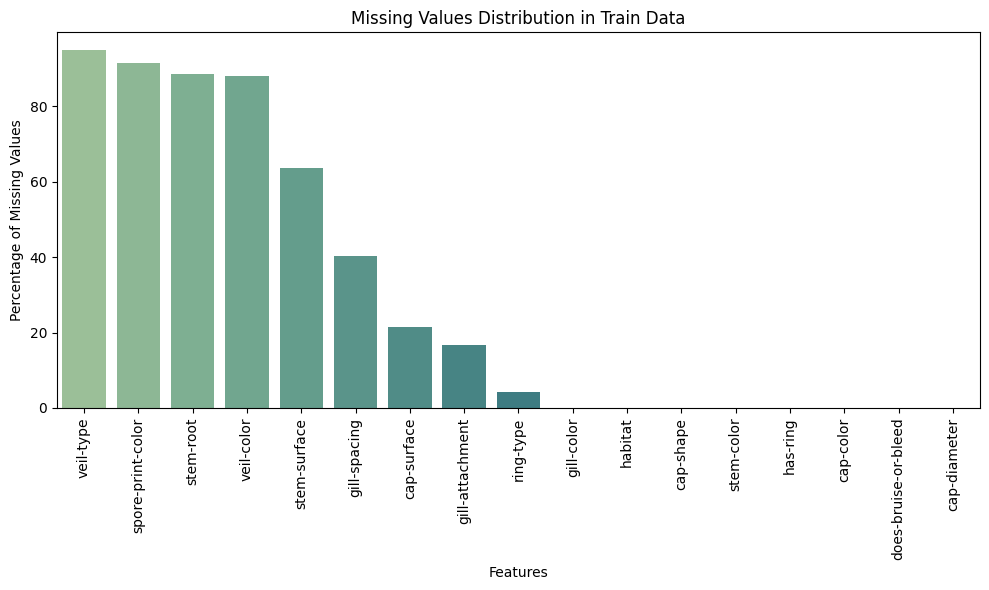

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate percentage of missing values
missing_values = train.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=missing_values.index, y=missing_values.values, palette='crest')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in Train Data')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [25]:
import pandas as pd
import numpy as np
import gc


# Calculate missing value percentages
missing_values_train = train.isnull().mean() * 100
missing_values_test = test.isnull().mean() * 100

# Identify columns with more than 95% missing values
cols_to_drop_train = missing_values_train[missing_values_train > 95].index
cols_to_drop_test = missing_values_test[missing_values_test > 95].index

# Drop columns from train and test DataFrames
train = train.drop(columns=cols_to_drop_train)
test = test.drop(columns=cols_to_drop_test)

# Clean up memory
gc.collect()



0

In [26]:
from sklearn.impute import KNNImputer
import pandas as pd

def knn_impute(train, n_neighbors=5):
    # Make a copy of the DataFrame to avoid modifying the original data
    df_encoded = train.copy()
    
    # Encode categorical columns
    cat_columns = df_encoded.select_dtypes(include='object').columns
    cat_mapping = {col: dict(enumerate(df_encoded[col].astype('category').cat.categories)) for col in cat_columns}
    for col in cat_columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    
    # Apply KNN imputation
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed_encoded = knn_imputer.fit_transform(df_encoded)
    
    # Convert the imputed data back to a DataFrame
    df_imputed = pd.DataFrame(df_imputed_encoded, columns=df_encoded.columns)
    
    # Decode categorical columns
    for col in cat_columns:
        df_imputed[col] = df_imputed[col].round().astype(int).map(cat_mapping[col])
    
    return df_imputed



In [27]:

# Apply KNN imputation
train_imputed = knn_impute(train, n_neighbors=5)
test_imputed = knn_impute(test, n_neighbors=5)



In [28]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Assuming df_train_imputed and df_test_imputed are already defined and imputed

# Identify categorical columns in the training set, excluding the target column
cat_cols_train = train_imputed.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the training data
train_imputed[cat_cols_train] = ordinal_encoder.fit_transform(train_imputed[cat_cols_train].astype(str))

# Transform the test data
test_imputed[cat_cols_train] = ordinal_encoder.transform(test_imputed[cat_cols_train].astype(str))


In [29]:
train_imputed.head()


class  cap-diameter  cap-shape  cap-surface  cap-color  \
0     e          8.80       53.0         73.0       73.0   
1     p          4.51       72.0         56.0       65.0   
2     e          6.94       53.0         73.0       49.0   
3     e          3.88       53.0         82.0       57.0   
4     e          5.85       72.0         65.0       75.0   

   does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                   8.0             44.0          28.0        60.0   
1                   8.0             44.0          28.0        46.0   
2                   8.0             76.0          28.0        60.0   
3                   8.0             71.0          41.0        37.0   
4                   8.0             47.0          41.0        60.0   

   stem-height  ...  stem-root  stem-surface  stem-color  veil-type  \
0         4.51  ...       27.0          48.0        56.0       15.0   
1         4.79  ...       27.0          59.0        48.0       15.0   
2         6.85  ...       27.0          52.0        46.0       15.0   
3         4.16  ...       27.0          48.0        56.0       15.0   
4         3.37  ...       27.0          48.0        56.0       15.0   

   veil-color  has-ring  ring-type  spore-print-color  habitat  season  
0        15.0       5.0       18.0               21.0     25.0     0.0  
1        15.0      19.0       40.0               21.0     25.0     3.0  
2        15.0       5.0       18.0               21.0     36.0     3.0  
3        15.0       5.0       18.0               21.0     25.0     2.0  
4        15.0       5.0       18.0               21.0     29.0     0.0  

[5 rows x 21 columns]

In [30]:
test_imputed.head()

cap-diameter  cap-shape  cap-surface  cap-color  does-bruise-or-bleed  \
0          8.64       72.0         68.0       63.0                  21.0   
1          6.90       64.0         77.0       65.0                   8.0   
2          2.00       48.0         55.0       63.0                   8.0   
3          3.47       72.0         77.0       63.0                   8.0   
4          6.17       72.0         56.0       77.0                   8.0   

   gill-attachment  gill-spacing  gill-color  stem-height  stem-width  \
0             65.0          41.0        60.0        11.13       17.12   
1             65.0          28.0        62.0         1.27       10.75   
2             65.0          28.0        46.0         6.18        3.14   
3             71.0          28.0        46.0         4.98        8.51   
4             67.0          41.0        62.0         6.73       13.70   

   stem-root  stem-surface  stem-color  veil-type  veil-color  has-ring  \
0       15.0          48.0        56.0       20.0        22.0      19.0   
1       27.0          48.0        46.0       15.0        15.0       5.0   
2       27.0          48.0        46.0       15.0        15.0       5.0   
3       27.0          48.0        56.0       15.0        14.0      19.0   
4       27.0          48.0        58.0       15.0        23.0      19.0   

   ring-type  spore-print-color  habitat  season  
0       19.0               21.0     25.0     0.0  
1       18.0               21.0     25.0     0.0  
2       18.0               21.0     25.0     1.0  
3       40.0               21.0     25.0     2.0  
4       26.0               21.0     25.0     2.0

In [31]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'train' is your DataFrame and 'class' is the target column

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'class' column_imputed
train_imputed['class'] = le.fit_transform(train_imputed['class'])

# STEP 4: Data Analysis

In [32]:
!pip install dython

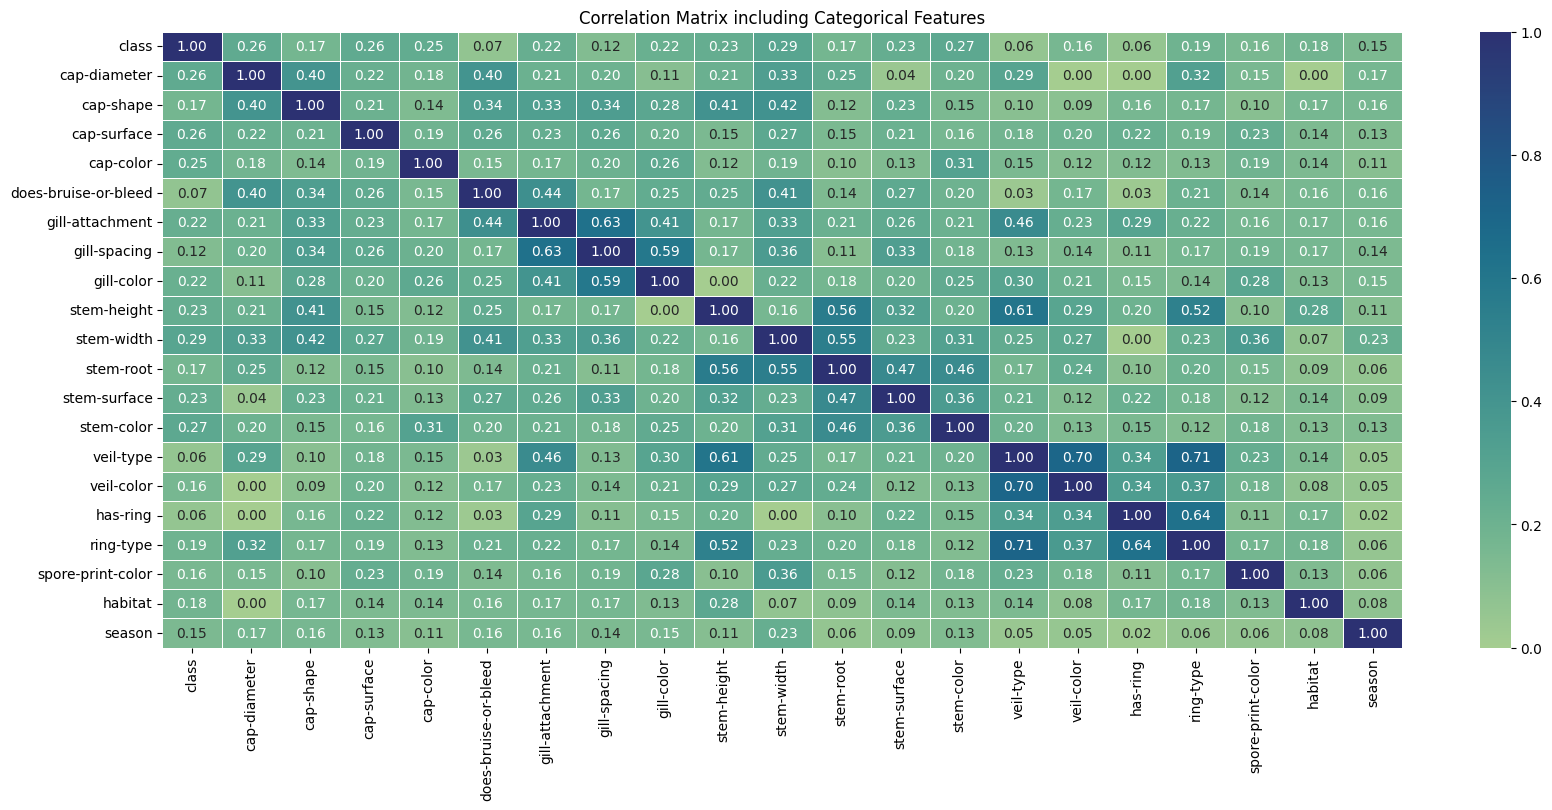

In [33]:
from dython.nominal import associations

associations_df = associations(train_imputed[:10000], nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFFFF') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

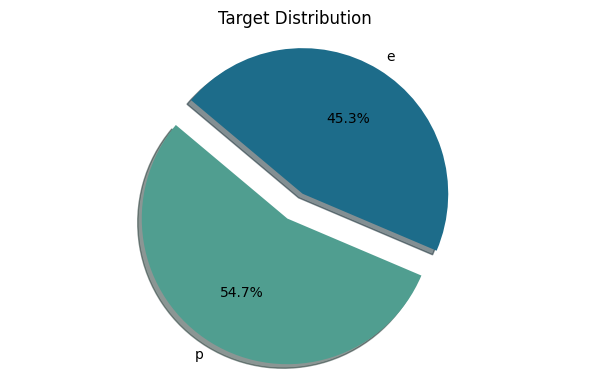

In [34]:
import matplotlib.pyplot as plt
import numpy as np


def plot_pie_chart(data, target, title, ax):
    # Calculate counts of each category
    data_counts = data[target].value_counts()
    labels = data_counts.index
    sizes = data_counts.values
    
    # Use the 'rocket' palette from Seaborn
    crest_palette = sns.color_palette('crest', n_colors=len(labels))
    colors = crest_palette.as_hex()  # Get hex color values
    
    # Define explode for a slight separation of slices
    explode = [0.1] * len(labels)  # Explode all slices for better visibility

    # Plot the pie chart
    wedges, texts, autotexts = ax.pie(
        sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140
    )
    
    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal') 
    
    # Title and legend customization
    ax.set_title(title)
    for text in texts:
        text.set_color('black')  # Set color of slice labels
    for autotext in autotexts:
        autotext.set_color('black')  # Set color of percentage labels

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust figure size as needed

# Plot the pie chart
plot_pie_chart(train_copy, "class", "Target Distribution", ax)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()





Numerical Columns (excluding target):
Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')


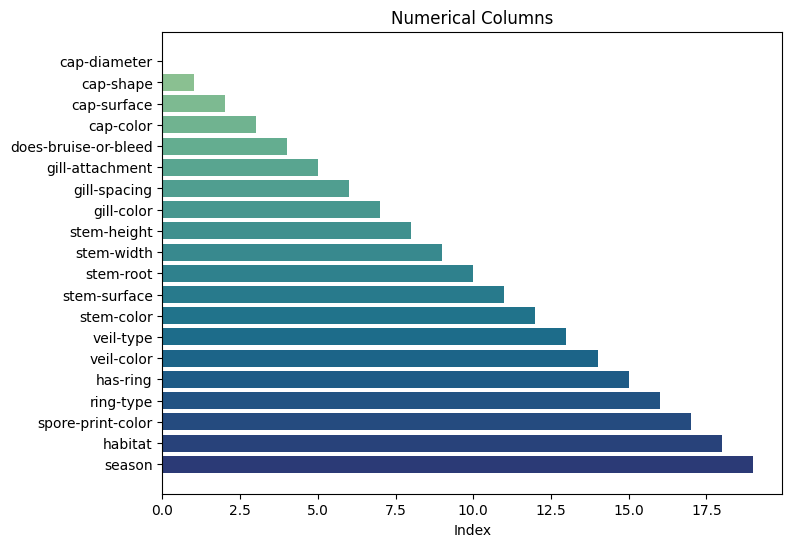

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the target column
target = 'class'

# Select numerical columns, excluding the target column if it's numerical
numerical_columns = train_imputed.select_dtypes(exclude=['object']).columns.drop(target, errors='ignore')

print("\nNumerical Columns (excluding target):")
print(numerical_columns)

# Visualize the categorical and numerical columns
def plot_column_names(columns, title, palette_name='crest'):
    plt.figure(figsize=(8, 6))
    colors = sns.color_palette(palette_name, len(columns))
    plt.barh(columns, range(len(columns)), color=colors)
    plt.xlabel('Index')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the first column on top
    plt.show()



# Plot numerical columns
plot_column_names(numerical_columns, 'Numerical Columns', palette_name='crest')


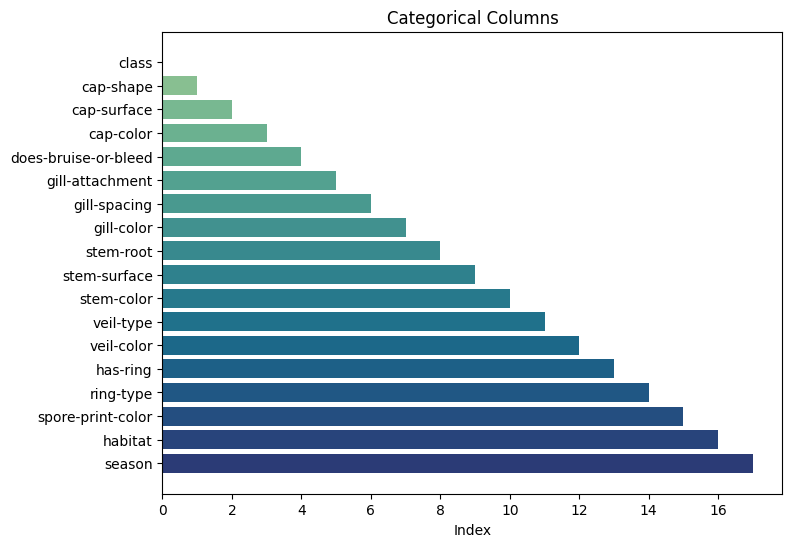

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Identify categorical columns
categorical_columns = train.select_dtypes(include=['object', 'category']).columns

# Define plotting function
def plot_categorical_columns(columns, title, palette_name='crest'):
    plt.figure(figsize=(8, 6))
    colors = sns.color_palette(palette_name, len(columns))
    plt.barh(columns, range(len(columns)), color=colors)
    plt.xlabel('Index')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the first column on top
    plt.show()

# Plot categorical columns
plot_categorical_columns(categorical_columns, 'Categorical Columns', palette_name='crest')


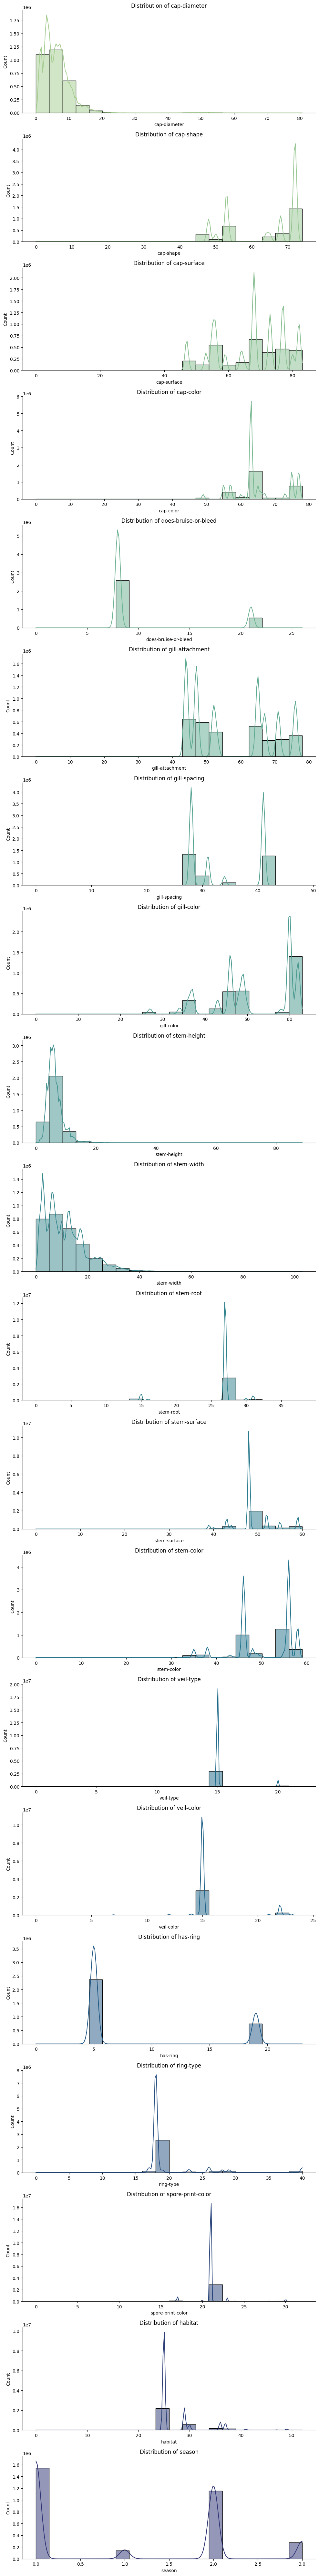

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

# Ensure you have the numerical columns list
numerical_columns = train_imputed.select_dtypes(exclude=['object']).columns.drop('class', errors='ignore')

# Obtain the "crest" colormap
cmap = plt.get_cmap('crest')

# Normalize the number of columns to fit the colormap
norm = Normalize(vmin=0, vmax=len(numerical_columns) - 1)

# Plot configuration
plt.figure(figsize=(10, len(numerical_columns) * 4))  # Adjust figure height based on the number of columns

# Loop over each numerical column and create a histogram plot
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)  # Create subplots based on the number of numerical columns
    
    # Determine the color for the histogram
    color = cmap(norm(i))
    
    # Create the histogram plot with the specified color
    sns.histplot(data=train_imputed, x=column, kde=True, bins=20, color=color)
    plt.title(f'Distribution of {column}')
    sns.despine()  # Remove spines for a cleaner look

plt.tight_layout()  # Adjust layout to prevent overlapping

# Save the plot to a file if necessary
# plt.savefig('numerical_columns_distribution.png', dpi=300)

plt.show()


Categorical Columns: Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color',
       'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')
Column: class
Filtered Categories: Index(['p', 'e'], dtype='object', name='class')
Filtered Data Shape: (3116945, 22)


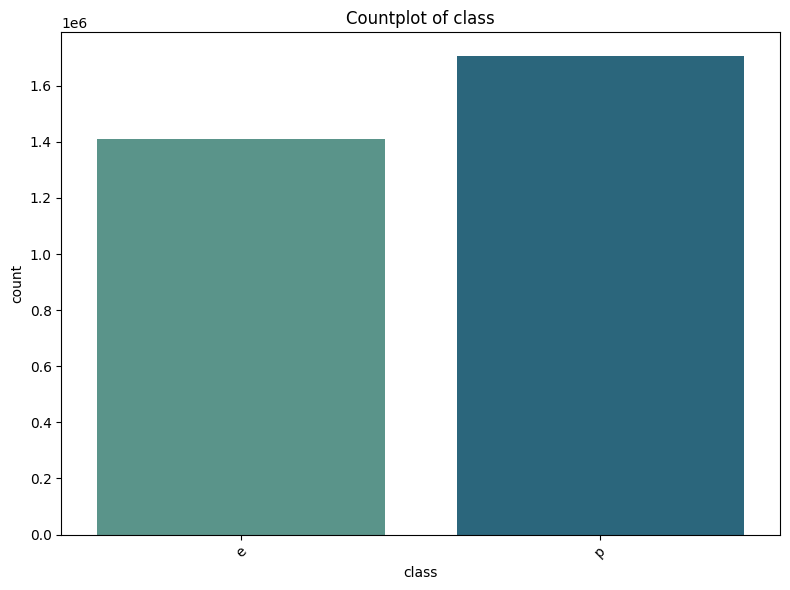

Column: cap-shape
Filtered Categories: Index(['x', 'f', 's', 'b', 'o', 'p', 'c', 'd', 'e', 'n', 't', 'w', 'g', 'y',
       'r', 'a'],
      dtype='object', name='cap-shape')
Filtered Data Shape: (3116745, 22)


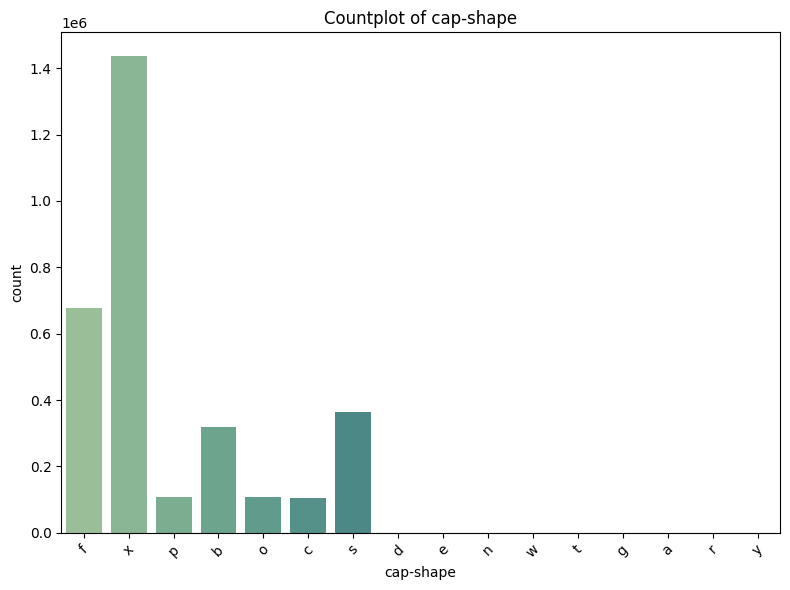

Column: cap-surface
Filtered Categories: Index(['t', 's', 'y', 'h', 'g', 'd', 'k', 'e', 'i', 'w', 'l', 'n', 'f', 'p',
       'u', 'a', 'm', 'o', 'r', 'x', 'c'],
      dtype='object', name='cap-surface')
Filtered Data Shape: (2445823, 22)


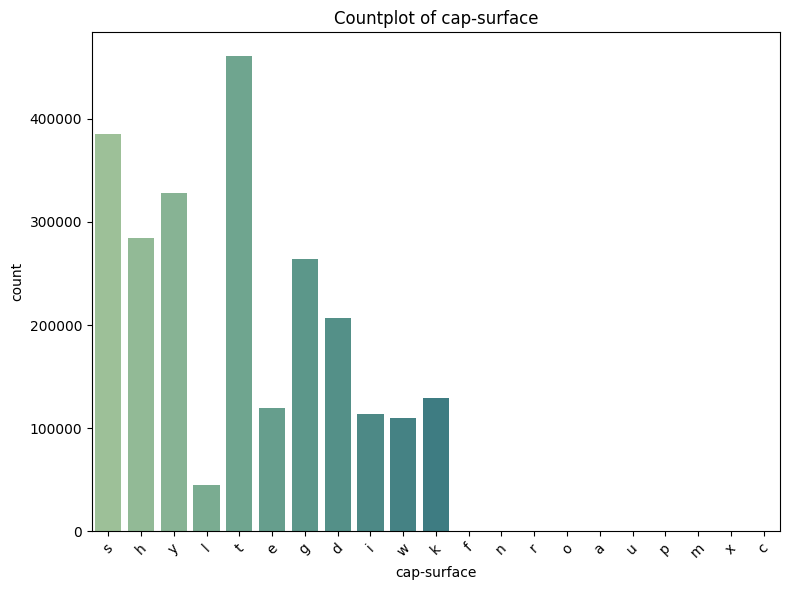

Column: cap-color
Filtered Categories: Index(['n', 'y', 'w', 'g', 'e', 'o', 'p', 'r', 'u', 'b', 'k', 'l', 'f', 'd',
       's', 'a'],
      dtype='object', name='cap-color')
Filtered Data Shape: (3116748, 22)


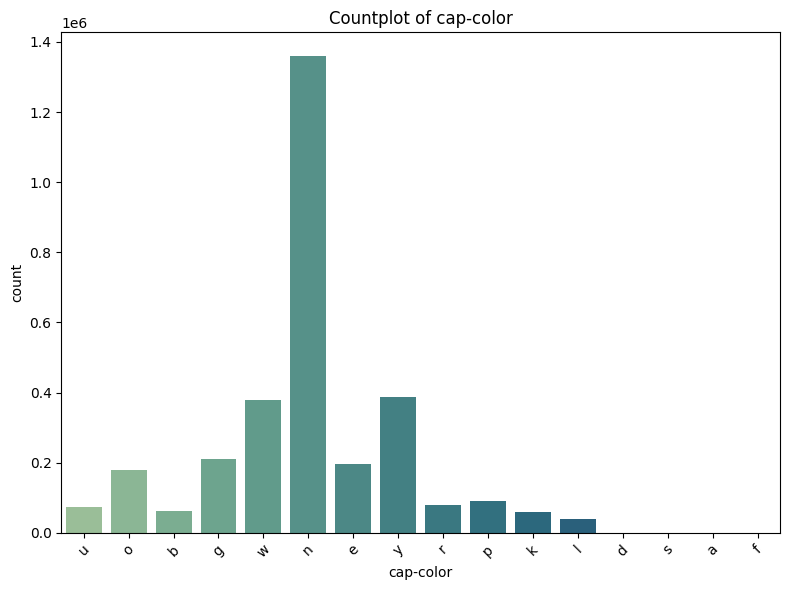

Column: does-bruise-or-bleed
Filtered Categories: Index(['f', 't'], dtype='object', name='does-bruise-or-bleed')
Filtered Data Shape: (3116828, 22)


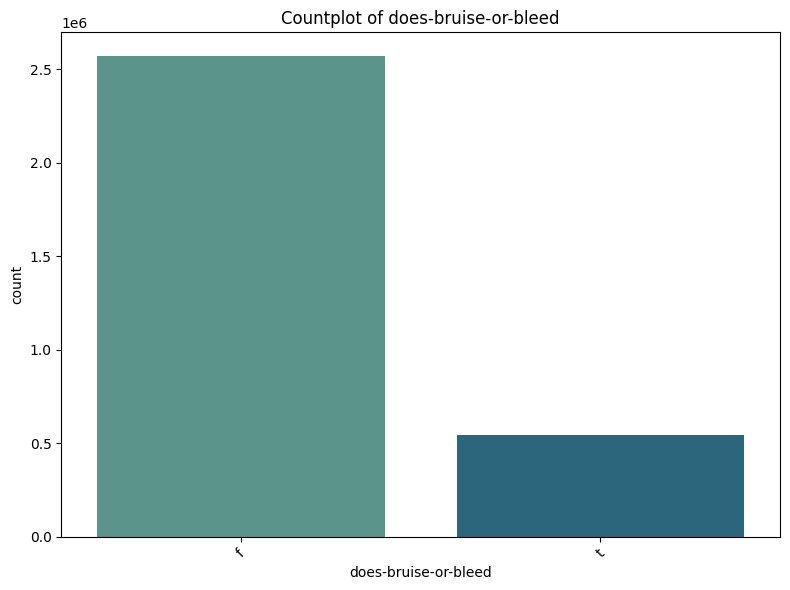

Column: gill-attachment
Filtered Categories: Index(['a', 'd', 'x', 'e', 's', 'p', 'f', 'c', 'u', 'w', 't', 'k'], dtype='object', name='gill-attachment')
Filtered Data Shape: (2592744, 22)


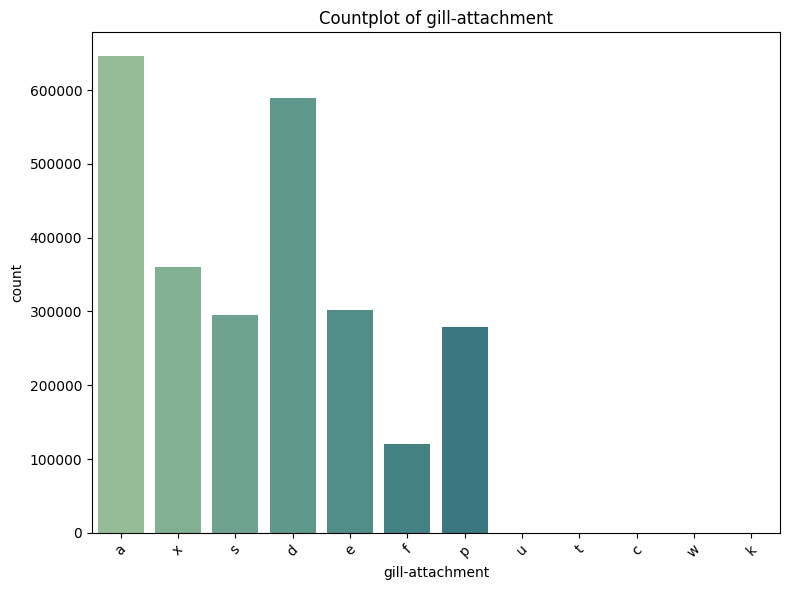

Column: gill-spacing
Filtered Categories: Index(['c', 'd', 'f'], dtype='object', name='gill-spacing')
Filtered Data Shape: (1858366, 22)


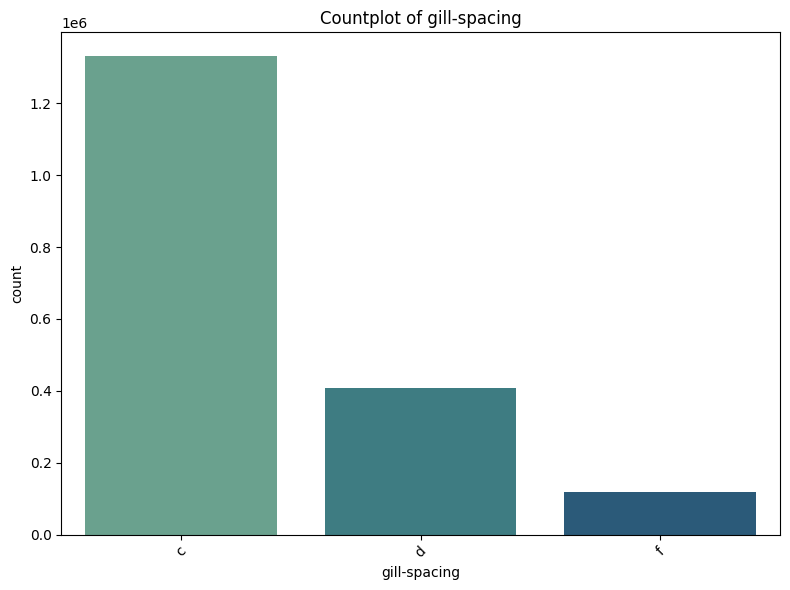

Column: gill-color
Filtered Categories: Index(['w', 'n', 'y', 'p', 'g', 'o', 'k', 'f', 'r', 'e', 'b', 'u', 'l', 'd',
       't', 's', 'x', 'c'],
      dtype='object', name='gill-color')
Filtered Data Shape: (3116728, 22)


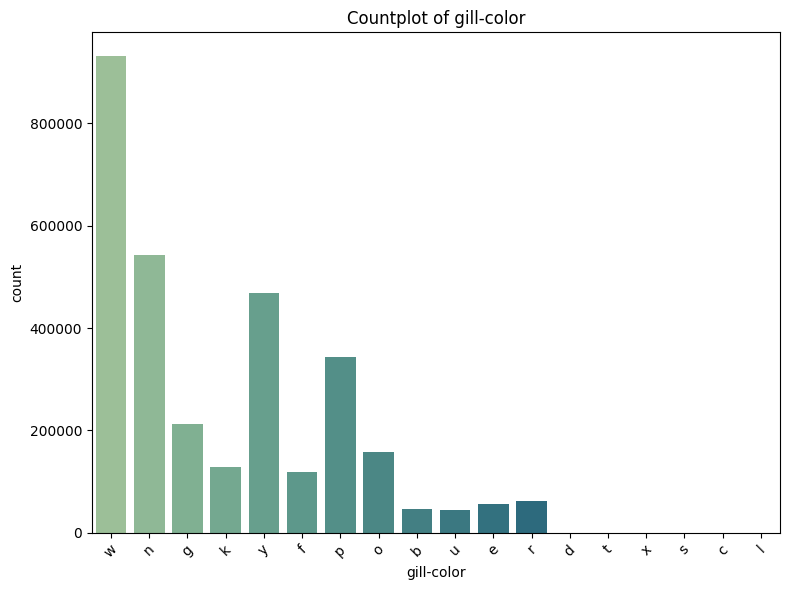

Column: stem-root
Filtered Categories: Index(['b', 's', 'r', 'c', 'f'], dtype='object', name='stem-root')
Filtered Data Shape: (359739, 22)


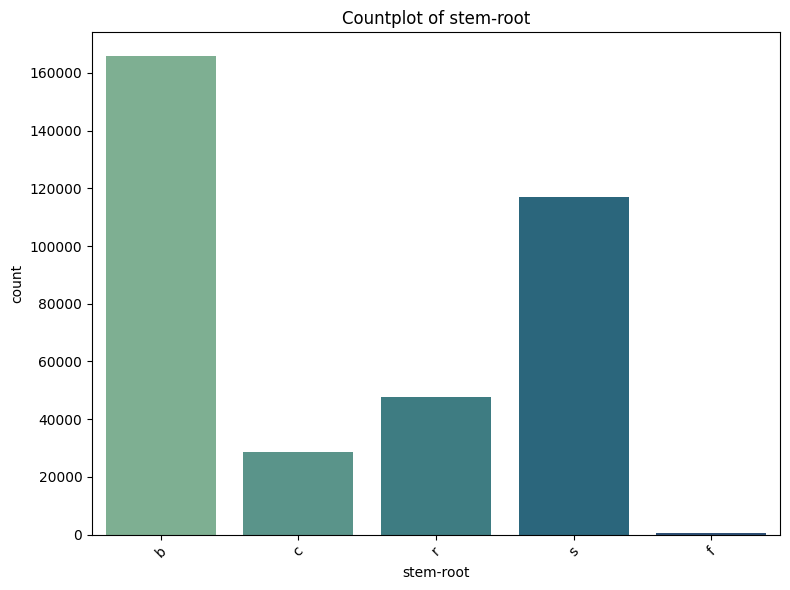

Column: stem-surface
Filtered Categories: Index(['s', 'y', 'i', 't', 'g', 'k', 'h', 'f', 'w', 'd', 'e', 'n'], dtype='object', name='stem-surface')
Filtered Data Shape: (1135855, 22)


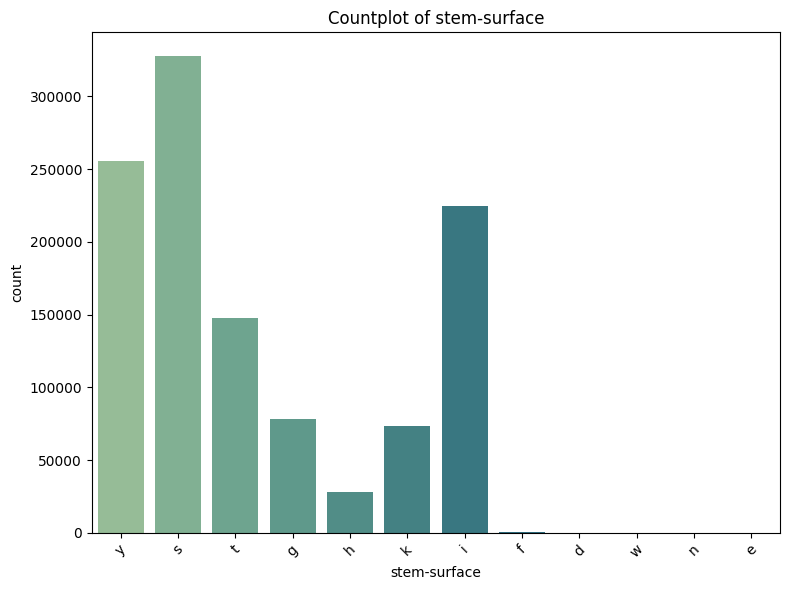

Column: stem-color
Filtered Categories: Index(['w', 'n', 'y', 'g', 'o', 'e', 'u', 'p', 'k', 'r', 'l', 'b', 'f', 's',
       't', 'a'],
      dtype='object', name='stem-color')
Filtered Data Shape: (3116776, 22)


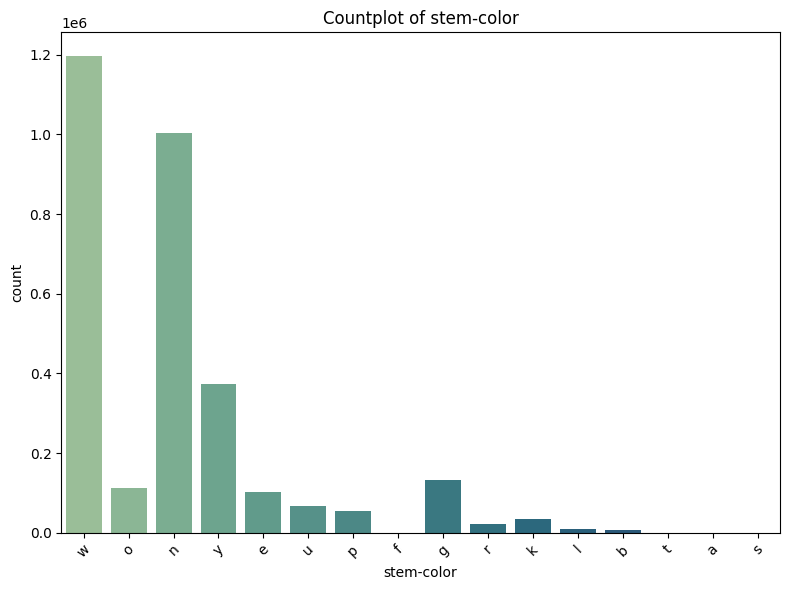

Column: veil-type
Filtered Categories: Index(['u'], dtype='object', name='veil-type')
Filtered Data Shape: (159373, 22)


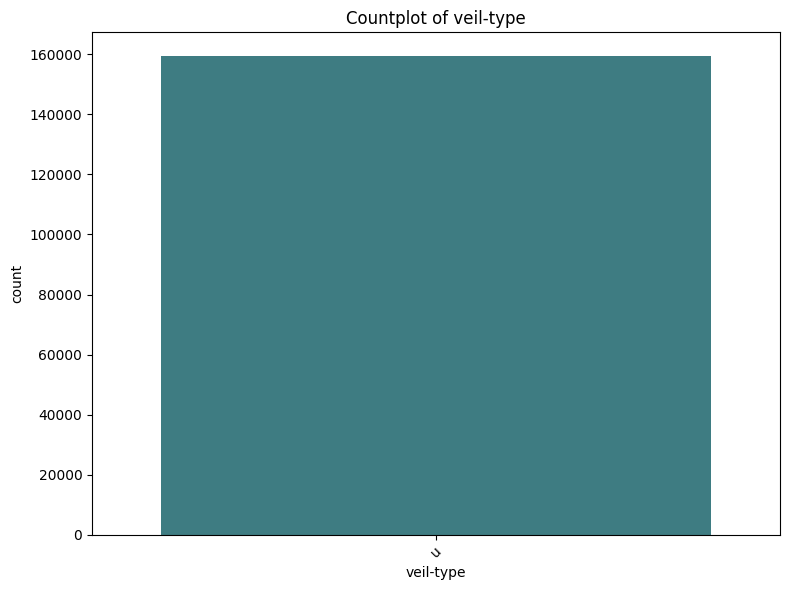

Column: veil-color
Filtered Categories: Index(['w', 'y', 'n', 'u', 'k', 'e', 'g'], dtype='object', name='veil-color')
Filtered Data Shape: (375887, 22)


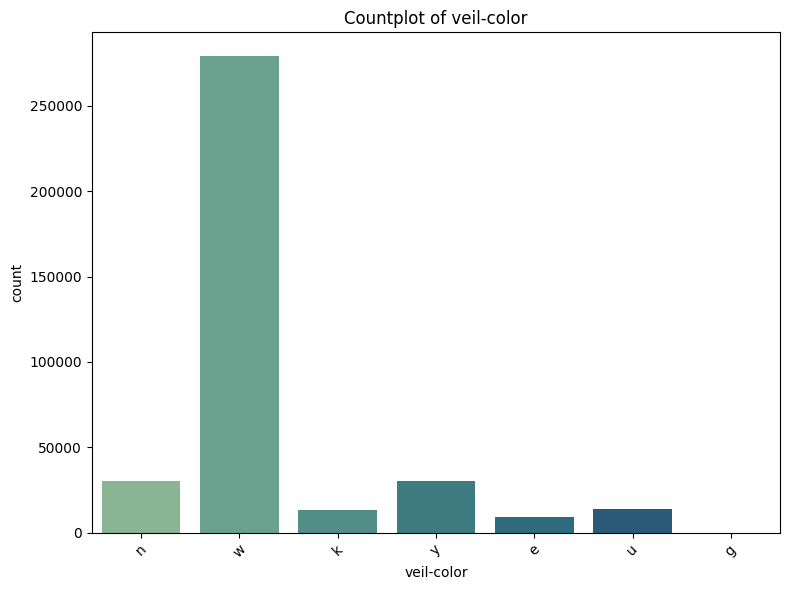

Column: has-ring
Filtered Categories: Index(['f', 't'], dtype='object', name='has-ring')
Filtered Data Shape: (3116802, 22)


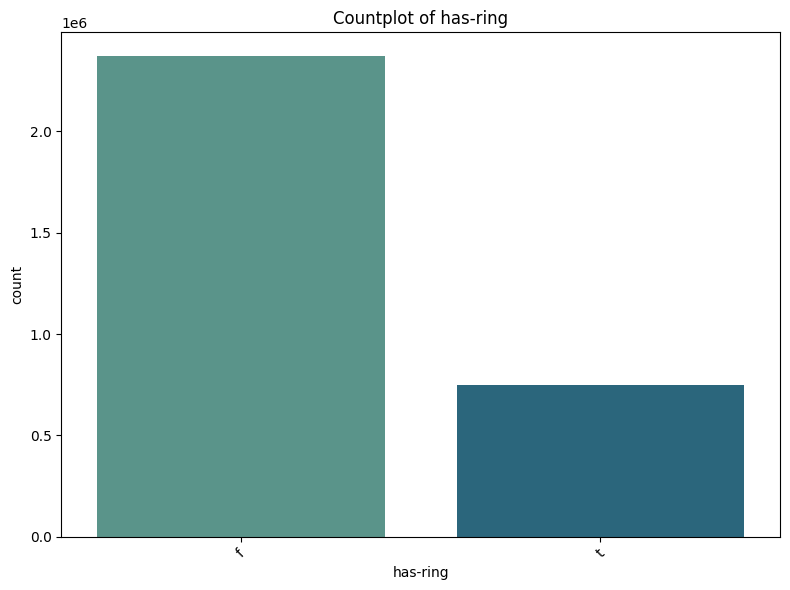

Column: ring-type
Filtered Categories: Index(['f', 'e', 'z', 'l', 'r', 'p', 'g', 'm', 't', 'd', 'n', 'x'], dtype='object', name='ring-type')
Filtered Data Shape: (2987866, 22)


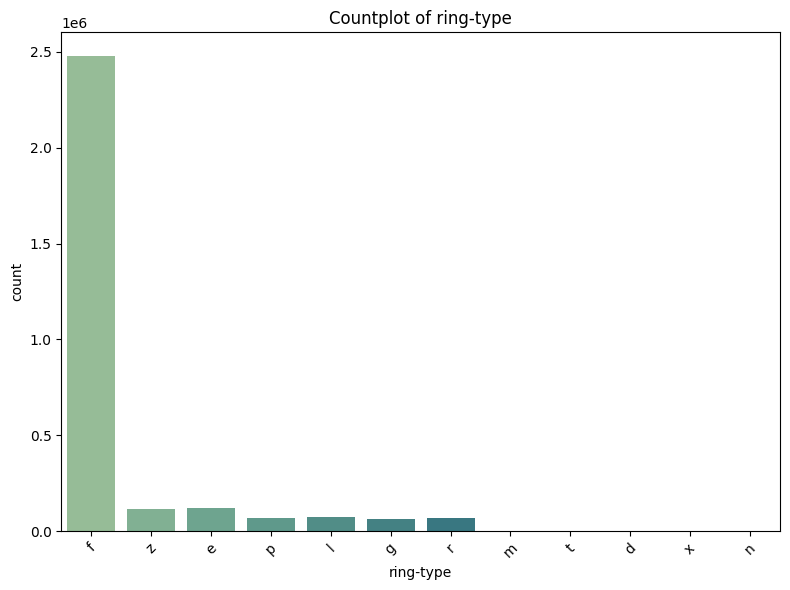

Column: spore-print-color
Filtered Categories: Index(['k', 'p', 'w', 'n', 'r', 'u', 'g', 'y'], dtype='object', name='spore-print-color')
Filtered Data Shape: (267125, 22)


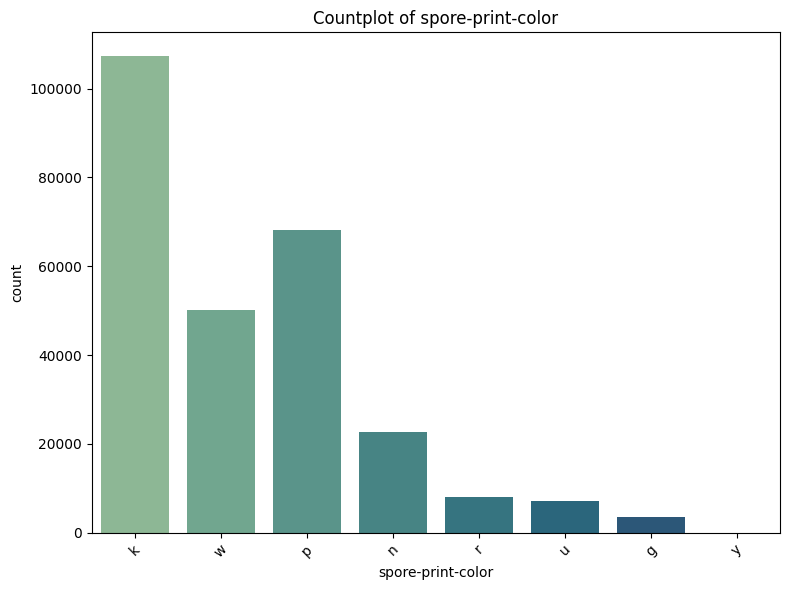

Column: habitat
Filtered Categories: Index(['d', 'g', 'l', 'm', 'h', 'w', 'p', 'u', 'e', 's', 'n', 't', 'r', 'y',
       'a', 'k'],
      dtype='object', name='habitat')
Filtered Data Shape: (3116778, 22)


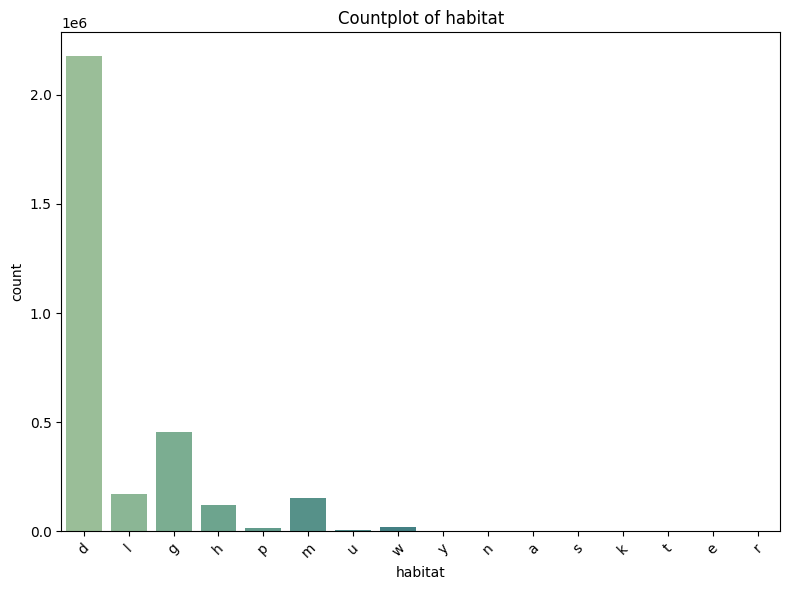

Column: season
Filtered Categories: Index(['a', 'u', 'w', 's'], dtype='object', name='season')
Filtered Data Shape: (3116945, 22)


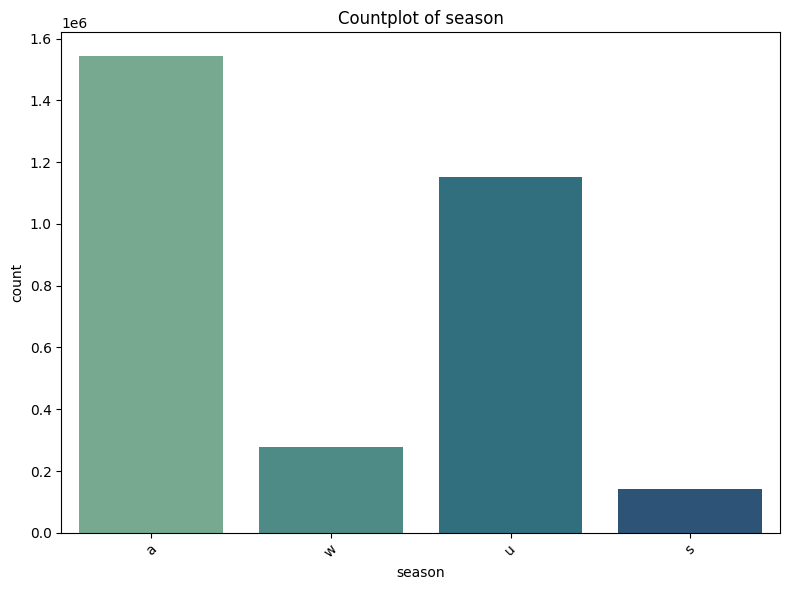

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')

# Define the categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Print categorical columns to ensure they are correctly identified
print(f"Categorical Columns: {categorical_columns}")

# Create count plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Increase figure size if necessary
    
    # Filter out categories with value counts less than 70
    filtered_data = train[column].value_counts()
    filtered_categories = filtered_data[filtered_data >= 30].index
    
    # Subset DataFrame to include only relevant categories
    filtered_df = train[train[column].isin(filtered_categories)]
    
    # Check the filtered data to ensure it‚Äôs correct
    print(f"Column: {column}")
    print(f"Filtered Categories: {filtered_categories}")
    print(f"Filtered Data Shape: {filtered_df.shape}")
    
    # Create the count plot
    sns.countplot(data=filtered_df, x=column, palette='crest')  # Use 'viridis' color palette
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)  # Rotate x labels if necessary
    plt.tight_layout()  # Adjust layout to prevent overlap
    
    # Show plot
    plt.show()

# STEP 5: Data Modeling

In [40]:
train = train_imputed
test = test_imputed

In [41]:
test.head()

cap-diameter  cap-shape  cap-surface  cap-color  does-bruise-or-bleed  \
0          8.64       72.0         68.0       63.0                  21.0   
1          6.90       64.0         77.0       65.0                   8.0   
2          2.00       48.0         55.0       63.0                   8.0   
3          3.47       72.0         77.0       63.0                   8.0   
4          6.17       72.0         56.0       77.0                   8.0   

   gill-attachment  gill-spacing  gill-color  stem-height  stem-width  \
0             65.0          41.0        60.0        11.13       17.12   
1             65.0          28.0        62.0         1.27       10.75   
2             65.0          28.0        46.0         6.18        3.14   
3             71.0          28.0        46.0         4.98        8.51   
4             67.0          41.0        62.0         6.73       13.70   

   stem-root  stem-surface  stem-color  veil-type  veil-color  has-ring  \
0       15.0          48.0        56.0       20.0        22.0      19.0   
1       27.0          48.0        46.0       15.0        15.0       5.0   
2       27.0          48.0        46.0       15.0        15.0       5.0   
3       27.0          48.0        56.0       15.0        14.0      19.0   
4       27.0          48.0        58.0       15.0        23.0      19.0   

   ring-type  spore-print-color  habitat  season  
0       19.0               21.0     25.0     0.0  
1       18.0               21.0     25.0     0.0  
2       18.0               21.0     25.0     1.0  
3       40.0               21.0     25.0     2.0  
4       26.0               21.0     25.0     2.0

In [42]:
X = train.drop(['class'],axis=1)
y = train['class'] 

In [43]:
X_train,X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state =42,stratify=y)

In [44]:
from sklearn.metrics import matthews_corrcoef

In [45]:

def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

In [46]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


# Define your XGBClassifier with the desired hyperparameters
model = XGBClassifier(
    alpha=0.1,
    subsample=0.8,
    colsample_bytree=0.6,
    objective='binary:logistic',
    max_depth=14,
    min_child_weight=7,
    gamma=1e-6,
    n_estimators=100
)

# Fit the model with custom MCC metric
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=mcc_metric,
    verbose=True  # Print evaluation results during training
)


[0]	validation_0-logloss:0.46304	validation_0-mcc:0.93019
[1]	validation_0-logloss:0.35431	validation_0-mcc:0.95693
[2]	validation_0-logloss:0.26486	validation_0-mcc:0.96703
[3]	validation_0-logloss:0.21065	validation_0-mcc:0.97254
[4]	validation_0-logloss:0.17147	validation_0-mcc:0.97550
[5]	validation_0-logloss:0.14002	validation_0-mcc:0.97640
[6]	validation_0-logloss:0.11683	validation_0-mcc:0.97726
[7]	validation_0-logloss:0.09522	validation_0-mcc:0.97938
[8]	validation_0-logloss:0.08194	validation_0-mcc:0.97989
[9]	validation_0-logloss:0.07133	validation_0-mcc:0.98045
[10]	validation_0-logloss:0.06181	validation_0-mcc:0.98150
[11]	validation_0-logloss:0.05740	validation_0-mcc:0.98160
[12]	validation_0-logloss:0.05230	validation_0-mcc:0.98175
[13]	validation_0-logloss:0.04916	validation_0-mcc:0.98202
[14]	validation_0-logloss:0.04557	validation_0-mcc:0.98253
[15]	validation_0-logloss:0.04449	validation_0-mcc:0.98264
[16]	validation_0-logloss:0.04264	validation_0-mcc:0.98291
[17]	va

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1e-06, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [47]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9922023006501558
Confusion Matrix:
[[280207   2103]
 [  2758 338321]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282310
           1       0.99      0.99      0.99    341079

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



In [48]:
score = matthews_corrcoef(y_test, y_pred)
print('MCC:', score)

MCC: 0.9842701108314986


In [50]:
from xgboost import XGBClassifier

# Define and train the model
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
test_pred_prob = XGB.predict(test)

In [51]:
test_pred_prob

array([0, 1, 1, ..., 1, 0, 0])

In [52]:
#test_pred_binary = (test_pred_prob > 0.5).astype(int)
test_pred_class = le.inverse_transform(test_pred_prob)

In [53]:

sub['class']= test_pred_class

# FINAL SUBMISSION

In [54]:
sub.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')

id class
0        3116945     e
1        3116946     p
2        3116947     p
3        3116948     p
4        3116949     e
...          ...   ...
2077959  5194904     p
2077960  5194905     p
2077961  5194906     p
2077962  5194907     e
2077963  5194908     e

[2077964 rows x 2 columns]

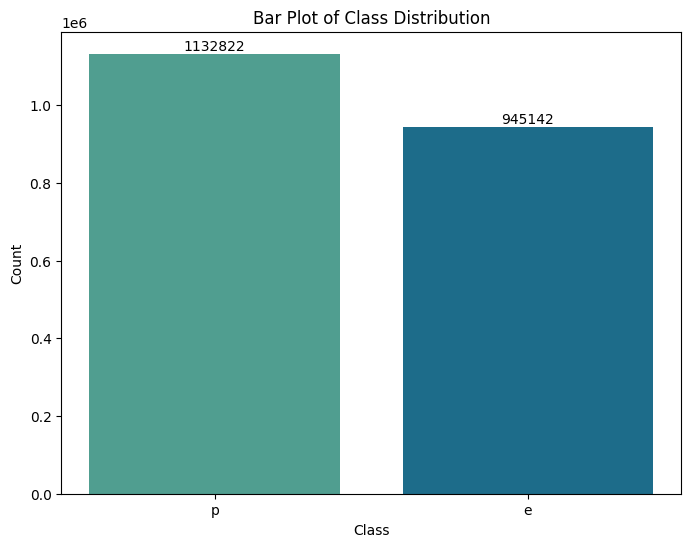

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Calculate the counts of each class
class_counts = sub['class'].value_counts()

# Set the color palette
palette = sns.color_palette("crest", n_colors=len(class_counts))

# Create a bar plot with seaborn color palette
plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=palette)  # Use the seaborn palette

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Add titles and labels
plt.title('Bar Plot of Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()
